<a href="https://colab.research.google.com/github/vineethkumar1608/datasciene1/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as snf
import matplotlib.pyplot as plt

 Q.  Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [4]:
su=pd.read_csv("/content/50_Startups.csv")
su.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
su.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

- Correlation matrix

In [5]:
su.corr()

<ipython-input-5-e05ab9c62192>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  su.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


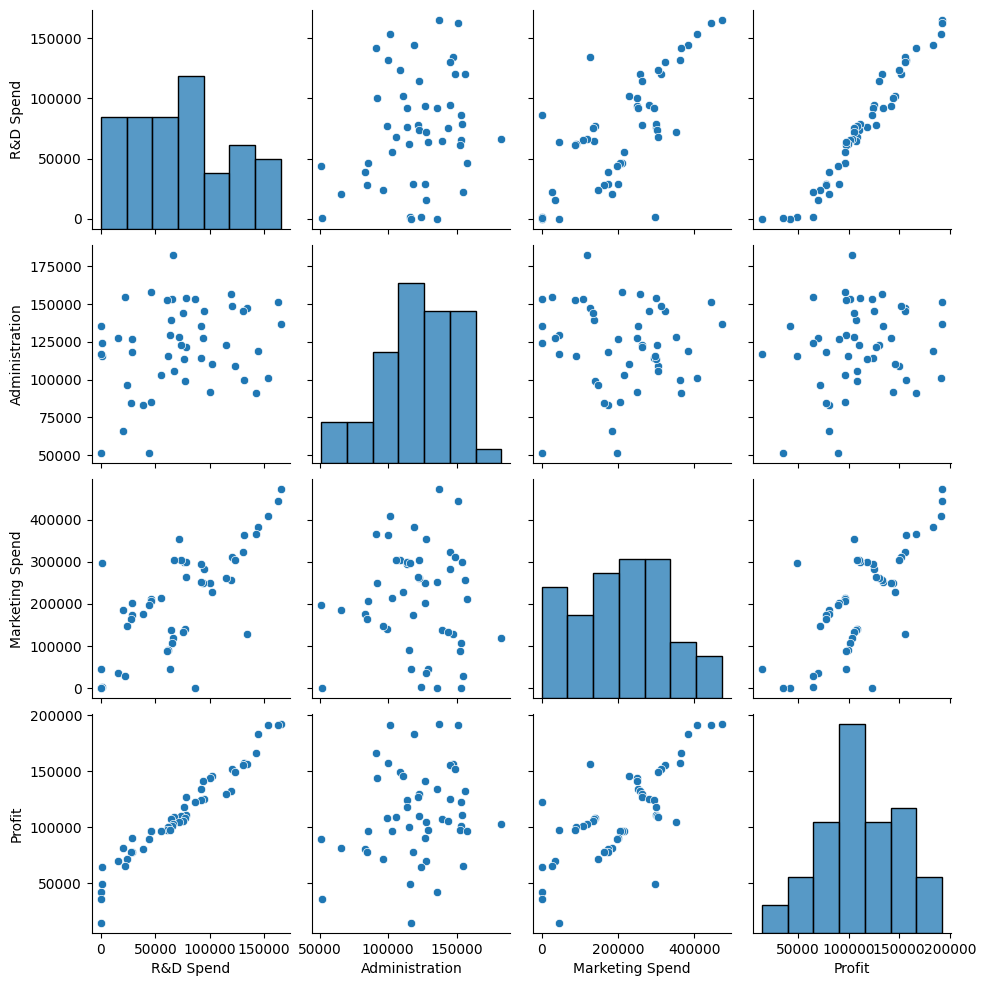

In [6]:
sns.pairplot(su)

In [9]:
su[su.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


- No duplicate data


In [5]:
startup=su.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startup.head(5)

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


- Model preparation

In [6]:
model = snf.ols('Profit~RDS+ADMS+MKTS',data=startup).fit()

In [13]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [16]:
np.round(model.pvalues,5)

Intercept    0.00000
RDS          0.00000
ADMS         0.60176
MKTS         0.10472
dtype: float64

In [18]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

- Building SLR for insignificant variables

In [7]:
slr_a = snf.ols("Profit~ADMS",data=startup).fit()
np.round(slr_a.pvalues,5)

Intercept    0.00382
ADMS         0.16222
dtype: float64

-ADMS is insignificant

In [8]:
slr_m = snf.ols("Profit~MKTS",data=startup).fit()
np.round(slr_m.pvalues,5)

Intercept    0.0
MKTS         0.0
dtype: float64

- MLR for adms and mkts

In [9]:
mlr=snf.ols("Profit~ADMS+MKTS",data=startup).fit()
np.round(mlr.pvalues,5)

Intercept    0.25893
ADMS         0.01729
MKTS         0.00000
dtype: float64

- Model validation
1. Collinearity check
    : Calculate VIF= 1/(1-Rsquare) for all independent variables


In [10]:
r_r=snf.ols("RDS~ADMS+MKTS",data=startup).fit().rsquared
vif_r=1/(1-r_r)

r_a=snf.ols("ADMS~RDS+MKTS",data=startup).fit().rsquared
vif_a=1/(1-r_a)

r_m=snf.ols("MKTS~RDS+ADMS",data=startup).fit().rsquared
vif_m=1/(1-r_m)

In [11]:
vif_r,vif_a,vif_m

(2.4689030699947017, 1.1750910070550453, 2.326773290530878)

- No variable has VIF > 20 so no collinearity , consider all variables in the regression

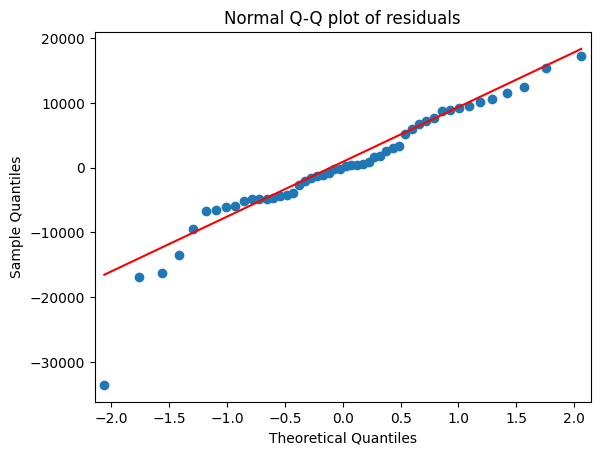

In [15]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid<-30000))

[array([49])]

-Residual Plot for Homoscedasticity

In [12]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

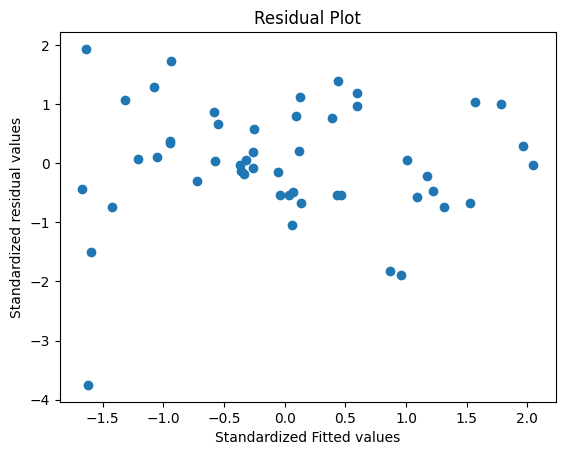

In [13]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

- Residual vs Regressors

eval_env: 1


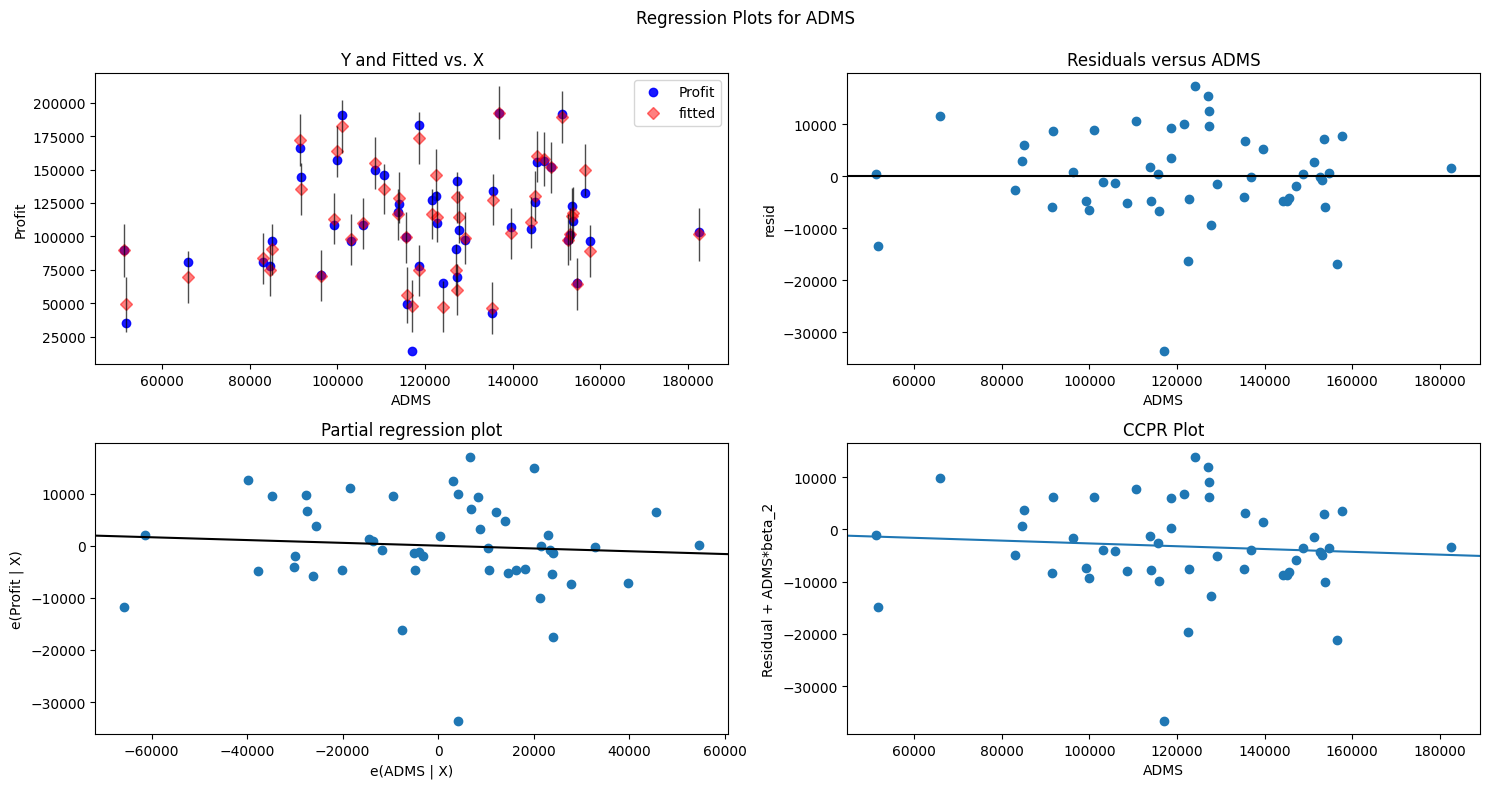

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

eval_env: 1


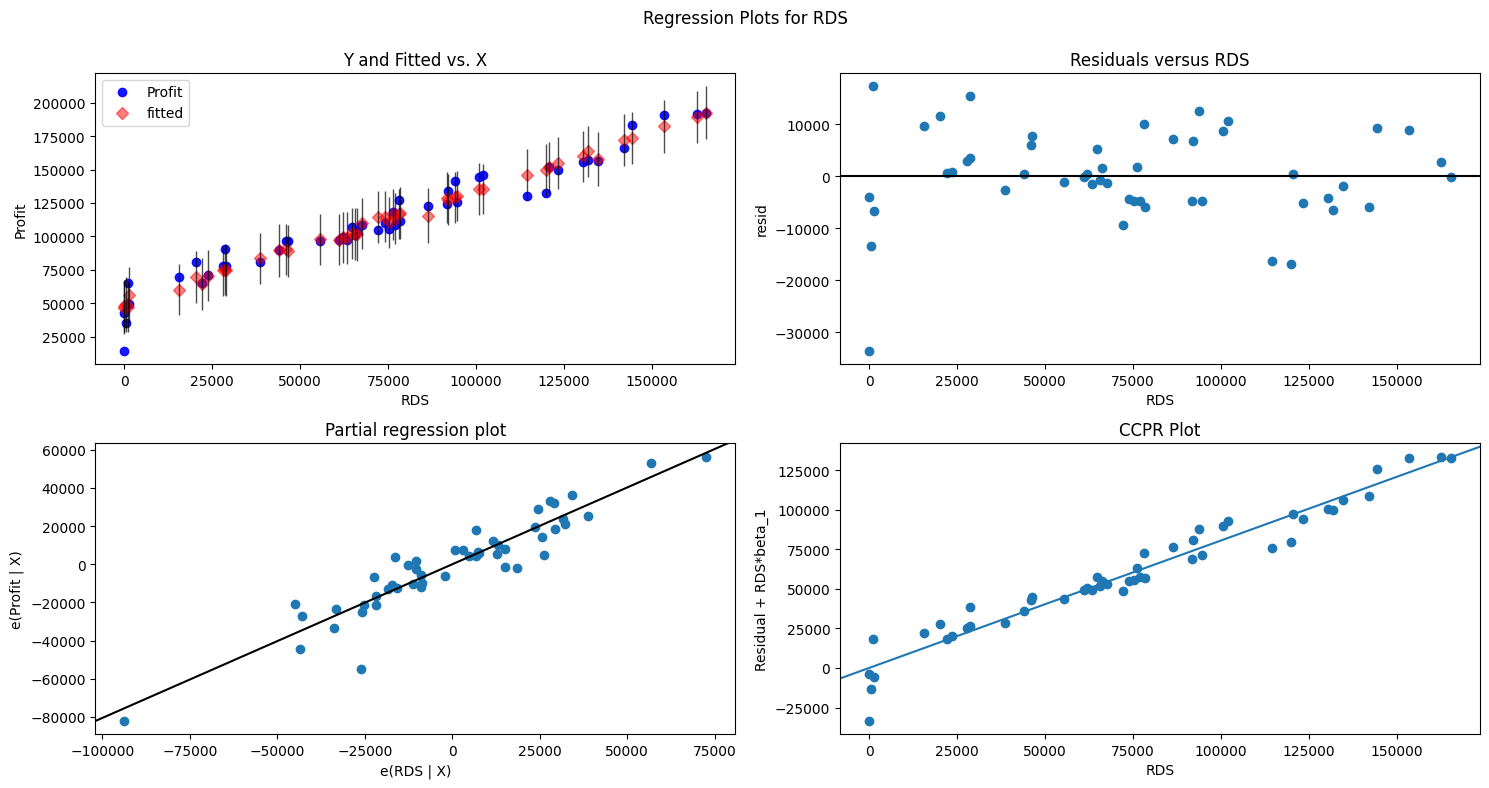

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


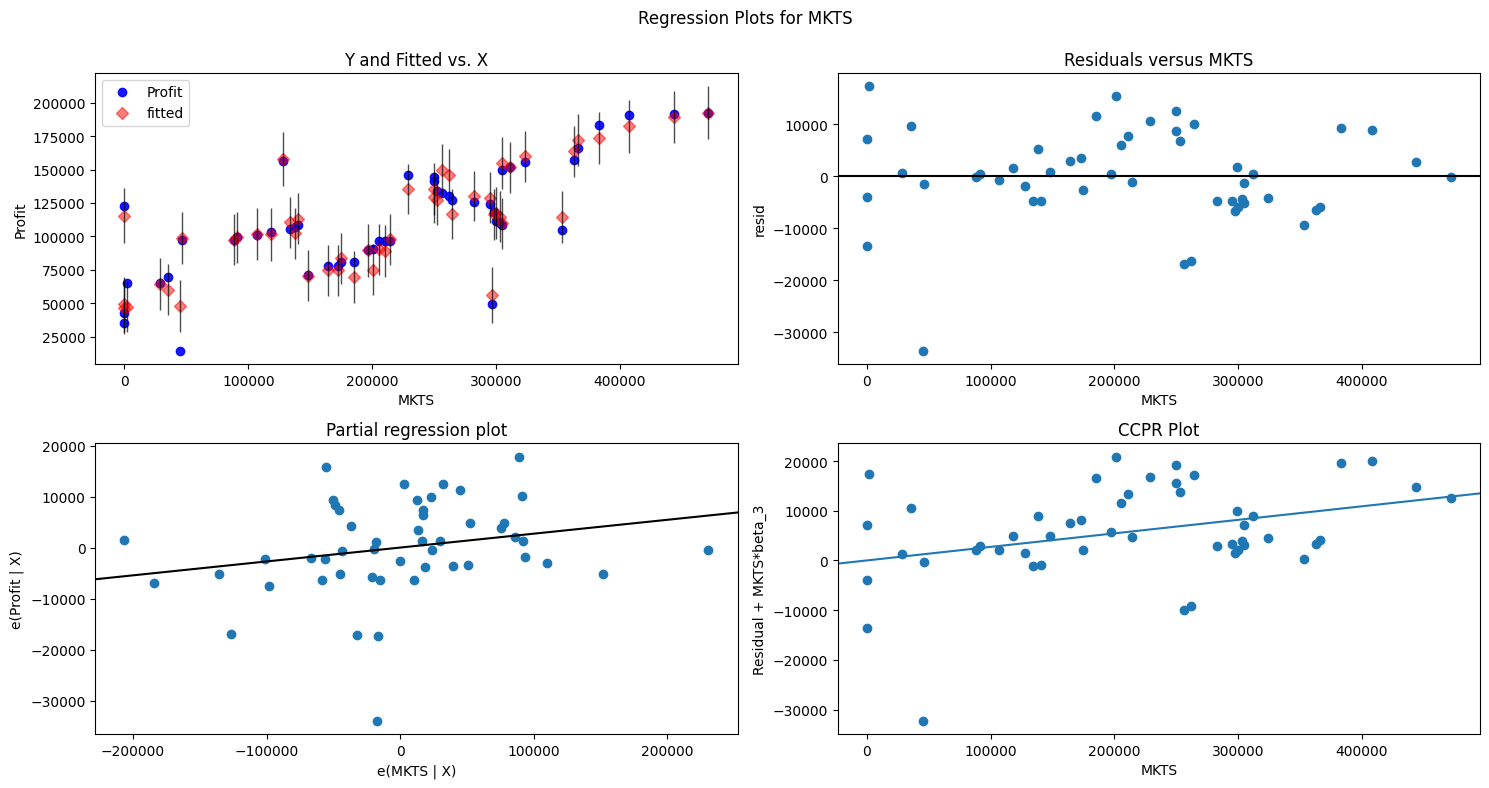

In [18]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig=fig)
plt.show()

- Model deletion diagnostics

In [20]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

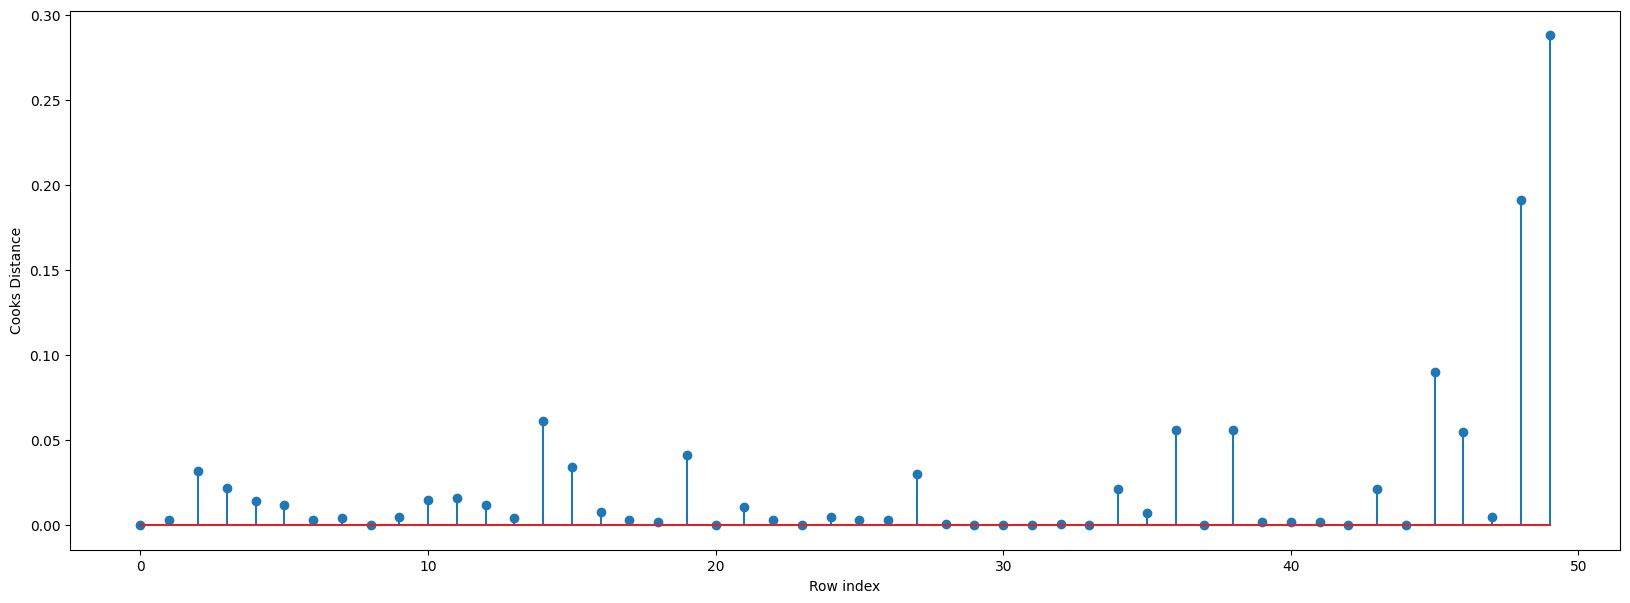

In [21]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [22]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

Hign influence points

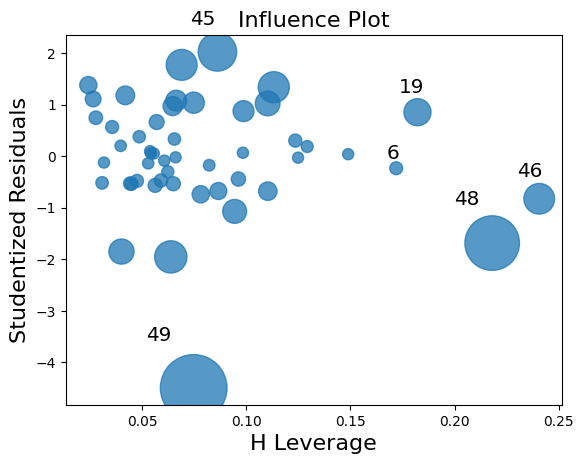

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [25]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [26]:
startup[startup.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


Improving the model.

In [27]:
start_new = pd.read_csv("/content/50_Startups.csv")
s_n=start_new.drop(start_new.index[[49]],axis=0).reset_index()

In [36]:
s_n=s_n.drop(['index'],axis=1)
s_n.tail(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [38]:
s_n=s_n.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
s_n.head(5)

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
final=snf.ols("Profit~RDS+ADMS+MKTS",data=s_n).fit()
final.rsquared,final.aic

(0.9613162435129847, 1020.5652974526367)

- Model Prediction

In [48]:
data=pd.DataFrame({'RDS':65000,"ADMS":92000,"MKTS":160000},index=[1])
data

,RDS,ADMS,MKTS
1,65000,92000,160000


In [49]:
final.predict(data)

1    105272.415161
dtype: float64

R squared values for each model

In [50]:
model.rsquared, final.rsquared

(0.9507459940683246, 0.9613162435129847)

Q2.Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]



Model -- model of the car
Price  -- Offer Price in EUROs
Age_08_04 -- Age in months as in August 2004
Mfg_Month -- Manufacturing month (1-12)
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [56]:
corolla=pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin1')
corolla.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [57]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [58]:
corolla[corolla.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


no duplicate values

In [59]:
corolla.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [60]:
corolla.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [62]:
tc=corolla.iloc[:,[2,3,6,8,12,13,15,16,17]]
tc.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [63]:
tc[tc.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [64]:
tc1=tc.drop_duplicates().reset_index(drop=True)
tc1.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [65]:
tc1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


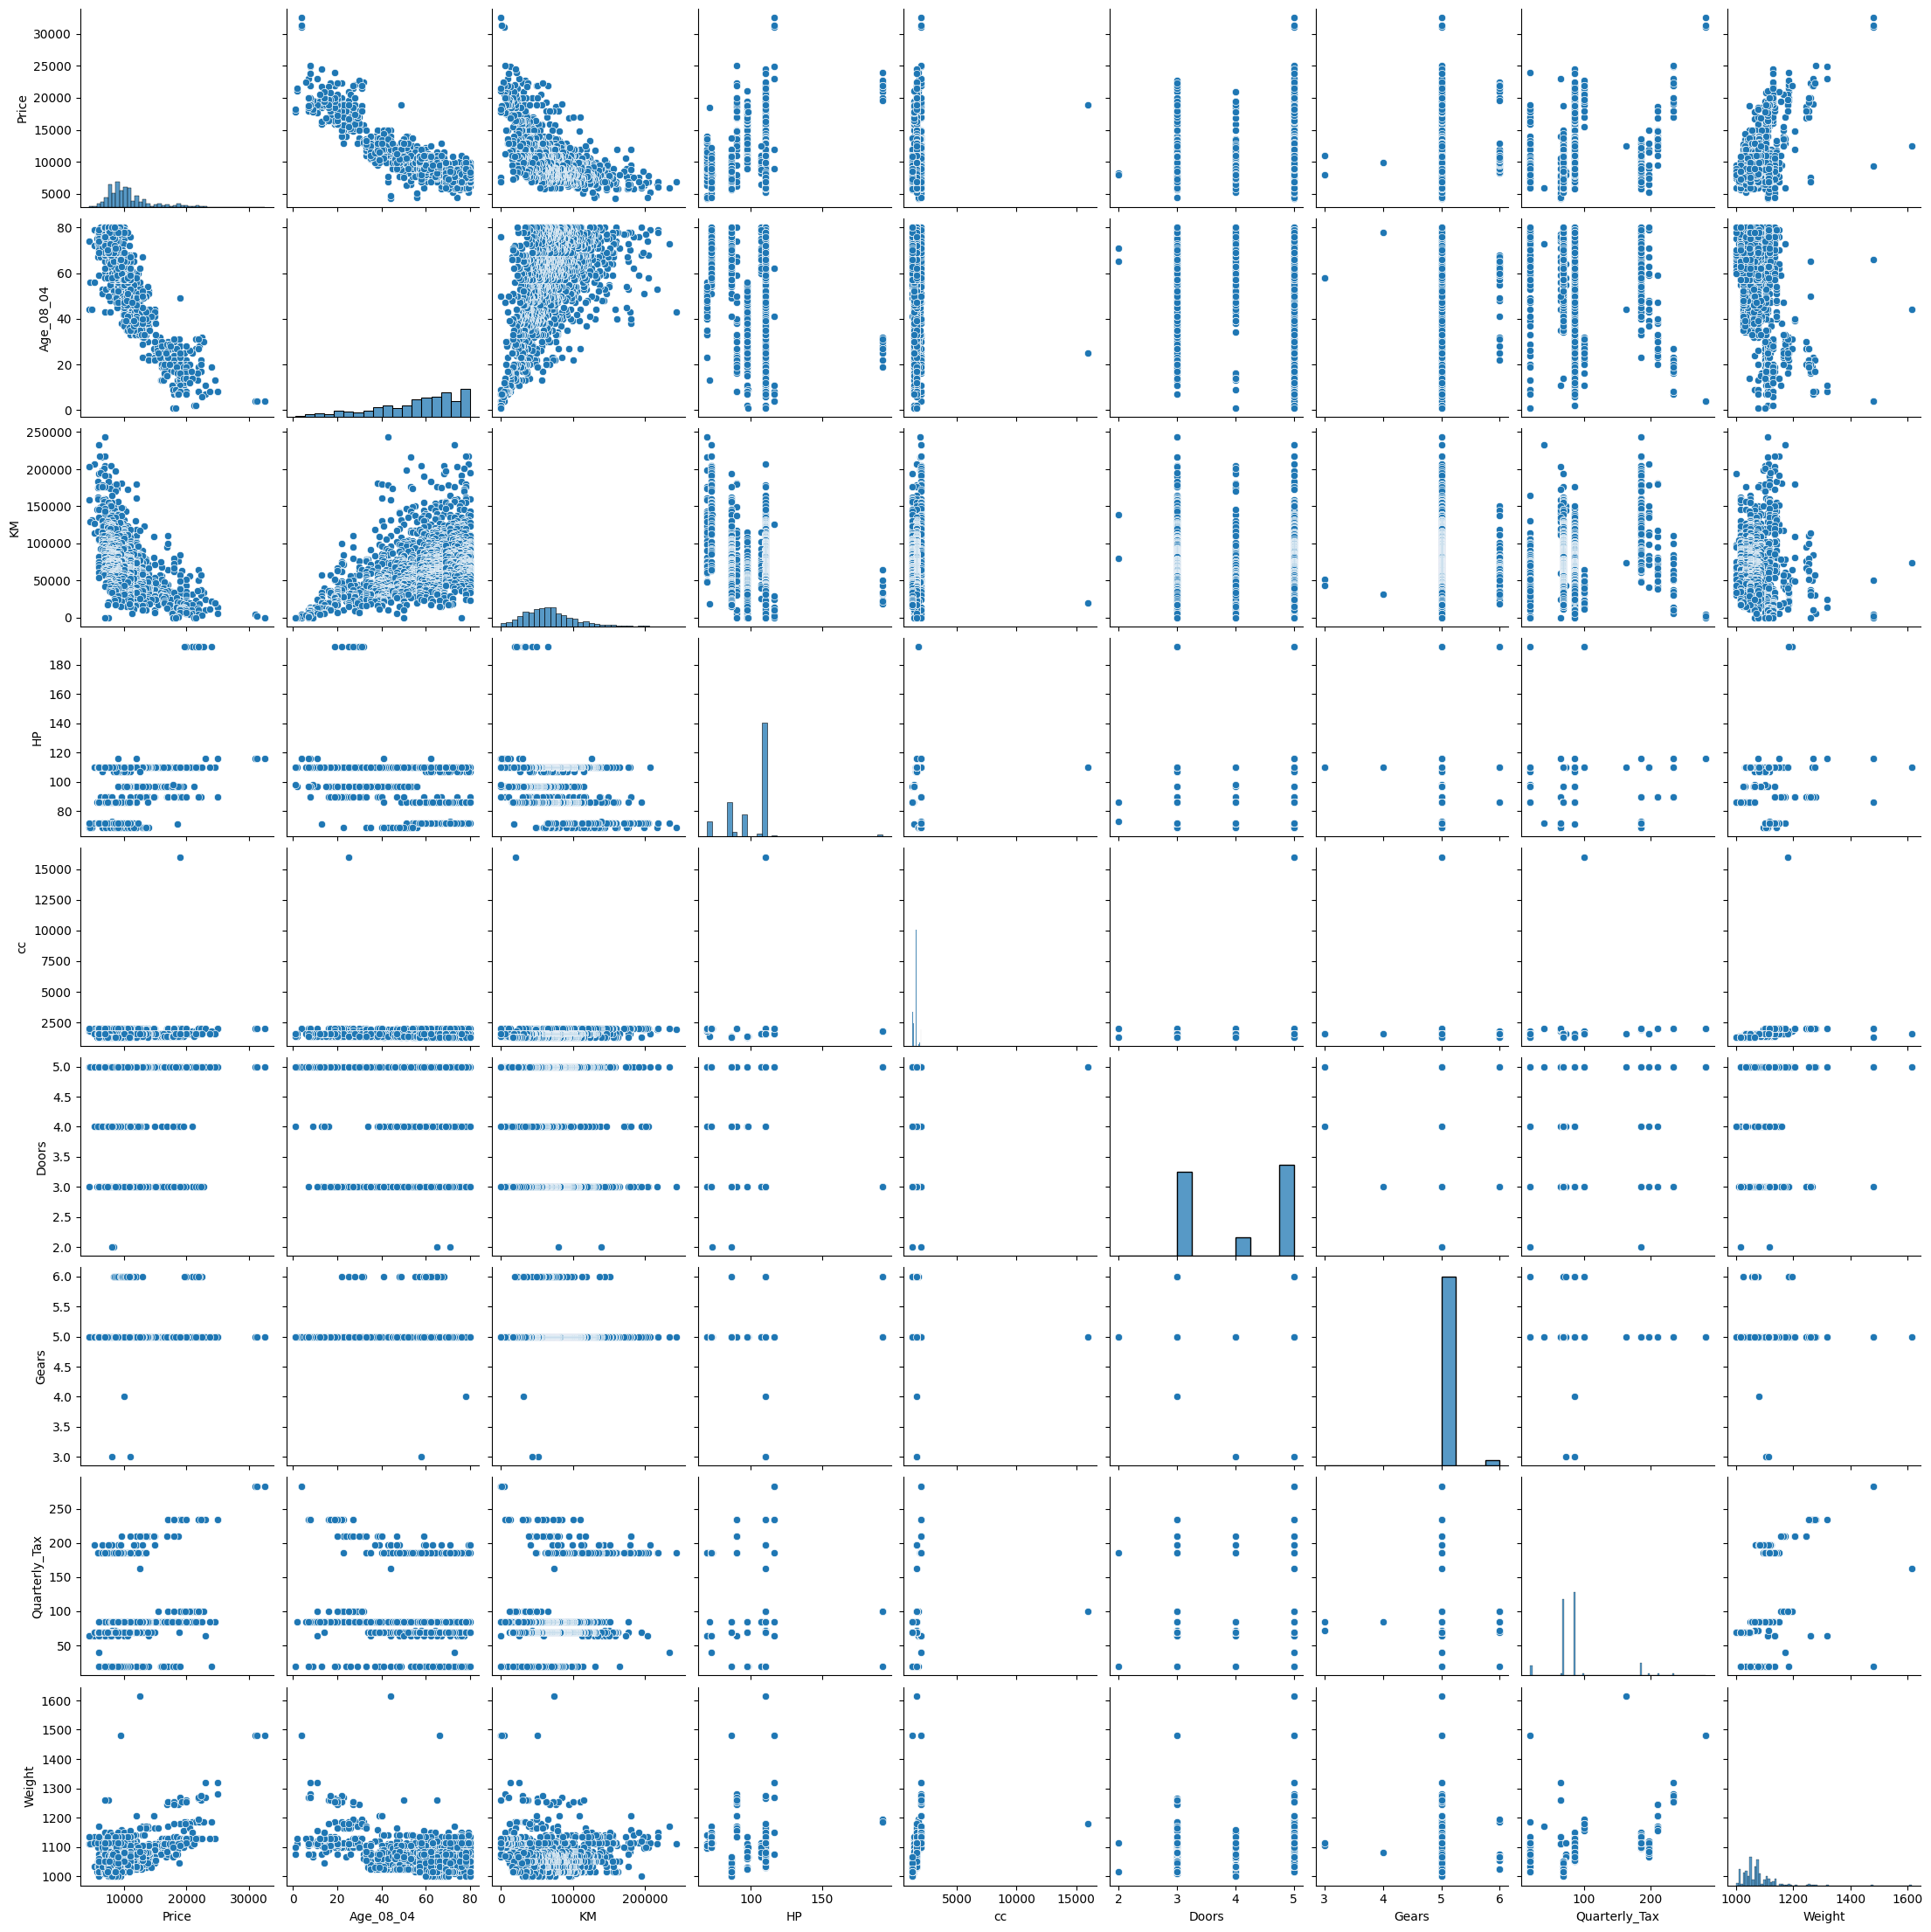

In [66]:
sns.pairplot(tc1)

-Model building

In [70]:
model=snf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=tc1).fit()

In [73]:
tc1.shape

(1435, 9)

In [71]:
model.params


Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [74]:
np.round(model.pvalues,5)

Intercept        0.00011
Age_08_04        0.00000
KM               0.00000
HP               0.00000
cc               0.18824
Doors            0.98164
Gears            0.00245
Quarterly_Tax    0.00329
Weight           0.00000
dtype: float64

In [75]:
model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

-insignificant variables are : cc and doors

- build SLR and MLR for variables

In [76]:
from seaborn.rcmod import set_context
set_context=snf.ols("Price~cc",data=tc1).fit()
np.round(s_d.pvalues,5)

Intercept    0.0
cc           0.0
dtype: float64

In [77]:
s_d=snf.ols("Price~Doors",data=tc1).fit()
np.round(s_d.pvalues,5)

Intercept    0.0
Doors        0.0
dtype: float64

In [78]:
m_cd=snf.ols("Price~cc+Doors",data=tc1).fit()
np.round(m_cd.pvalues,3)

Intercept    0.0
cc           0.0
Doors        0.0
dtype: float64

-VIF calculation

In [80]:
rsq_age = snf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = tc1).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = snf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data = tc1).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = snf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data = tc1).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = snf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data = tc1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_d = snf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data = tc1).fit().rsquared
vif_d = 1/(1-rsq_d)

rsq_g = snf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data = tc1).fit().rsquared
vif_g = 1/(1-rsq_g)

rsq_q = snf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data = tc1).fit().rsquared
vif_q = 1/(1-rsq_q)

rsq_w = snf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax', data = tc1).fit().rsquared
vif_w = 1/(1-rsq_w)

#Storing vif values in dataframe
d1 = {'Variables':['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight'], 'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_d, vif_g, vif_q,vif_w]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


- all values are under 20 so no collinearity problem

-Residual analysis

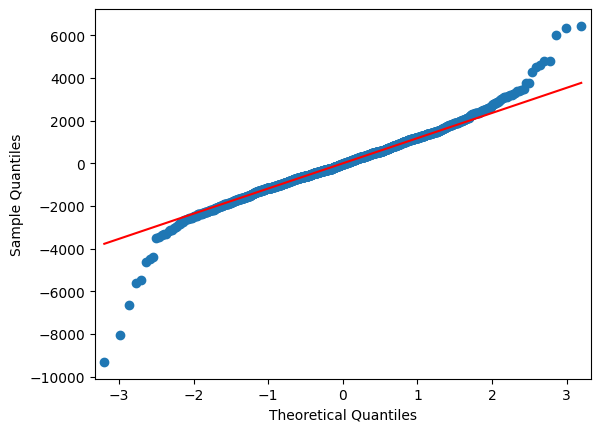

In [81]:
qqplt= sm.qqplot(model.resid,line='q')
plt.show()

In [85]:
list(np.where(model.resid<-6000)),list(np.where(model.resid>6000))

([array([220, 600, 959])], [array([109, 146, 522])])

-Plot for Homoscedasticity

In [83]:
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()

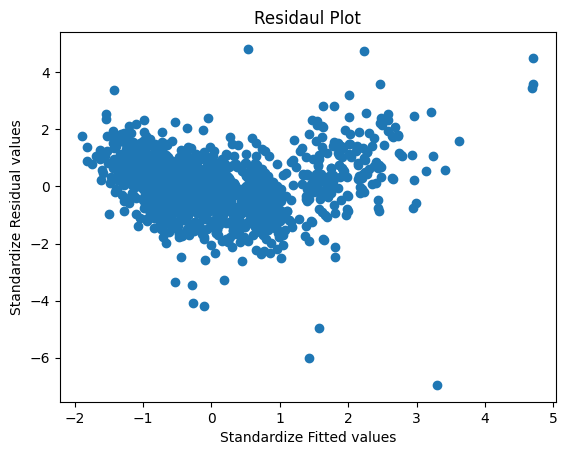

In [86]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

eval_env: 1


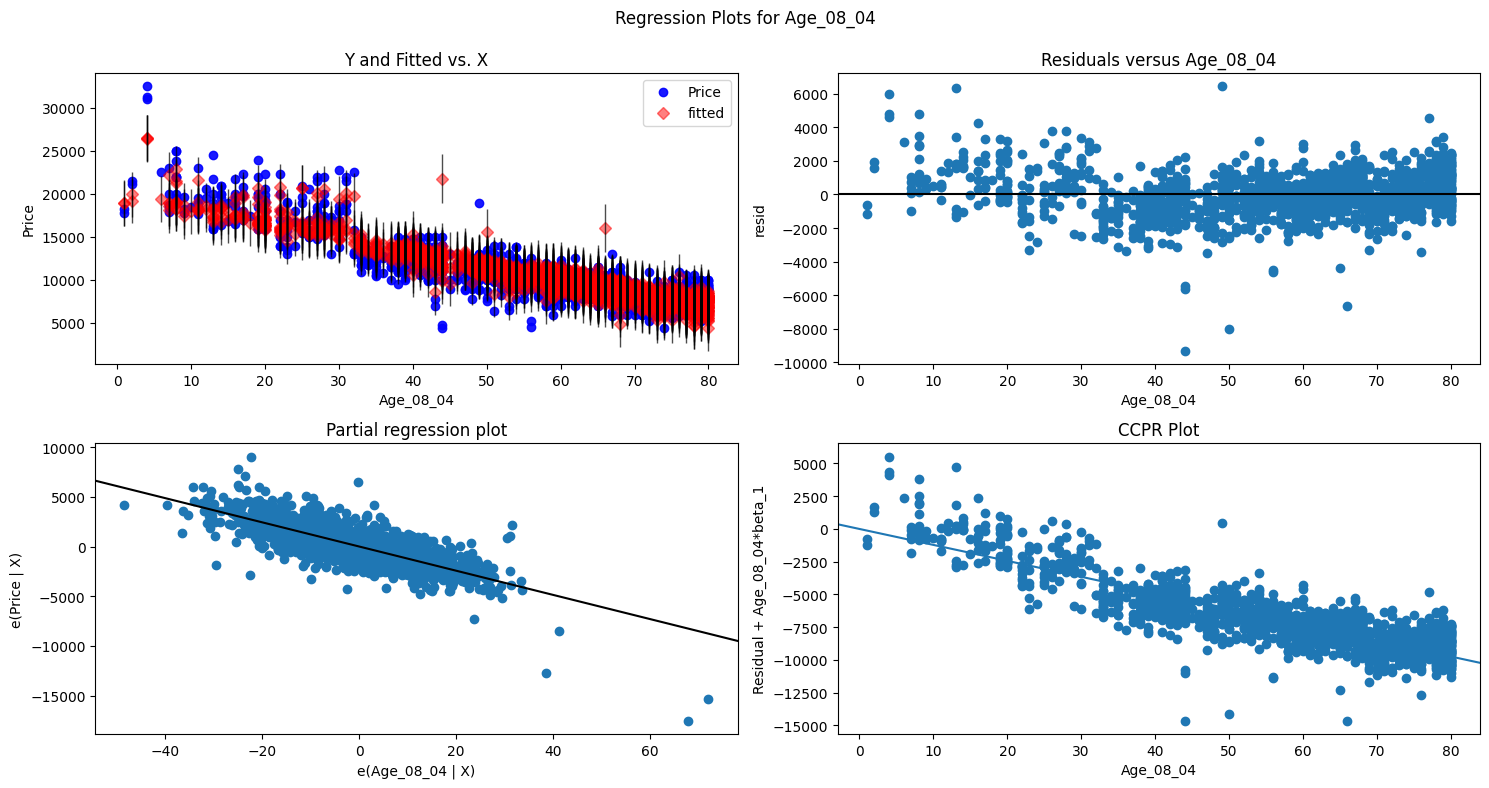

In [87]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


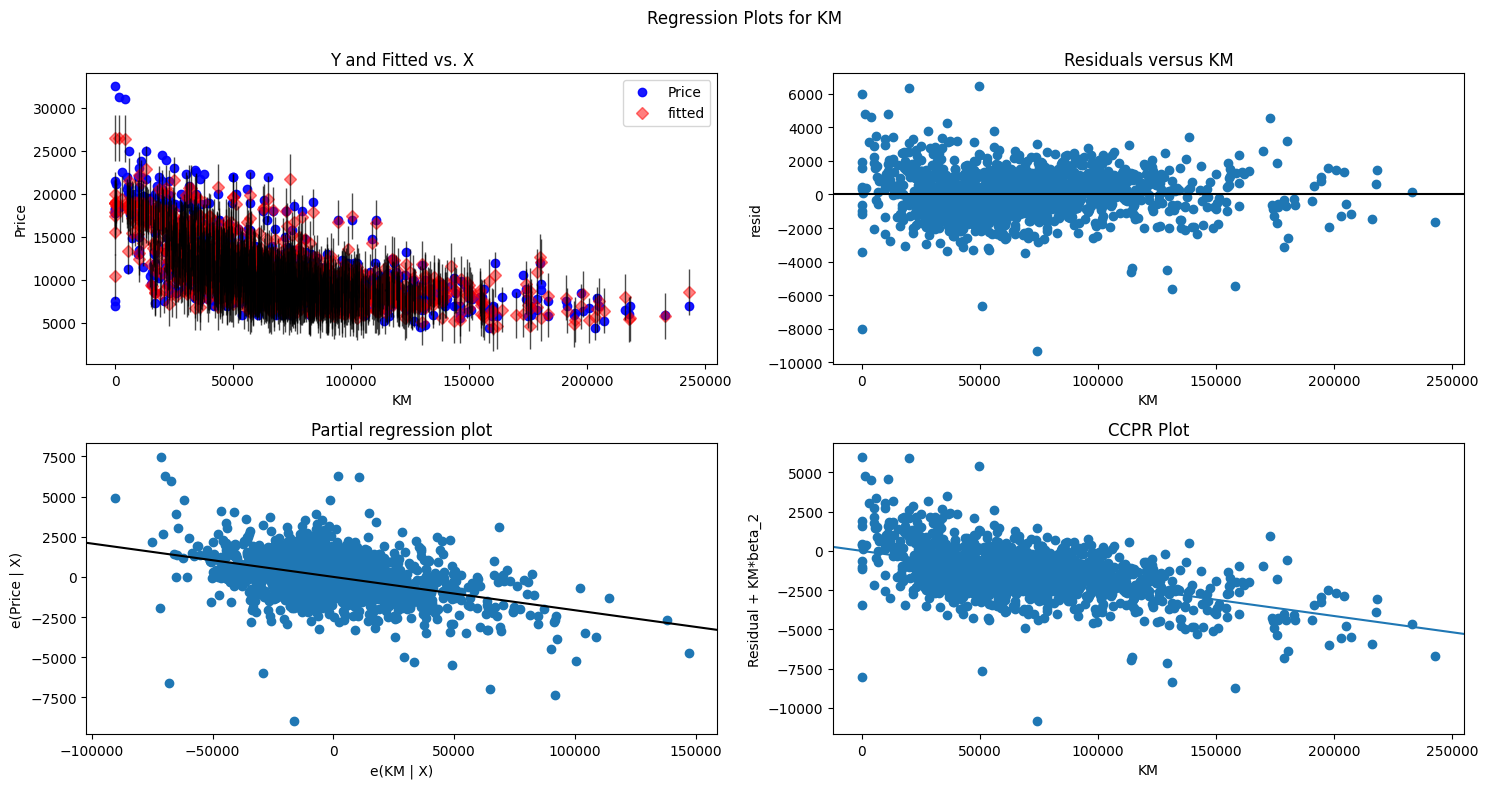

In [88]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


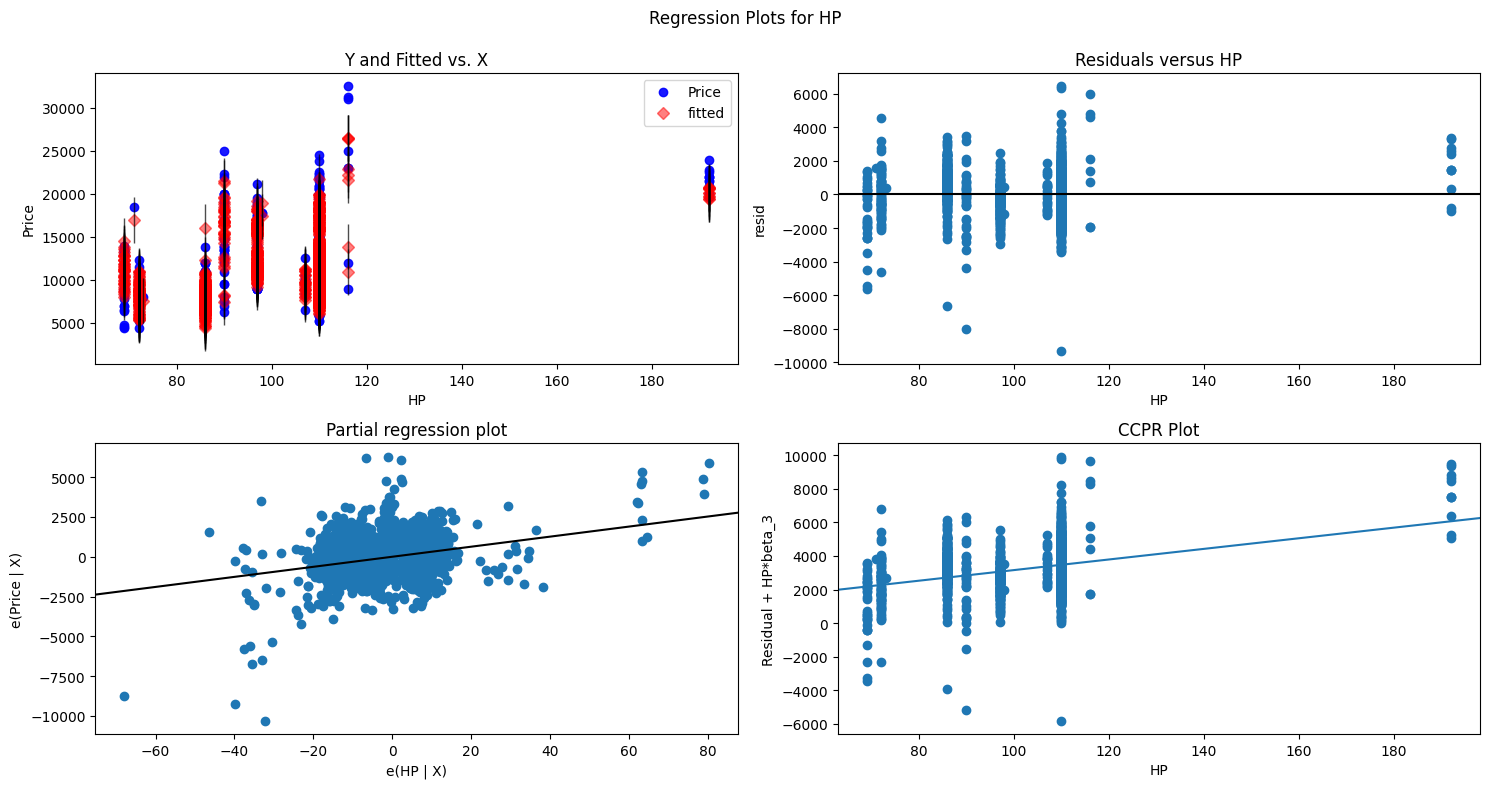

In [89]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


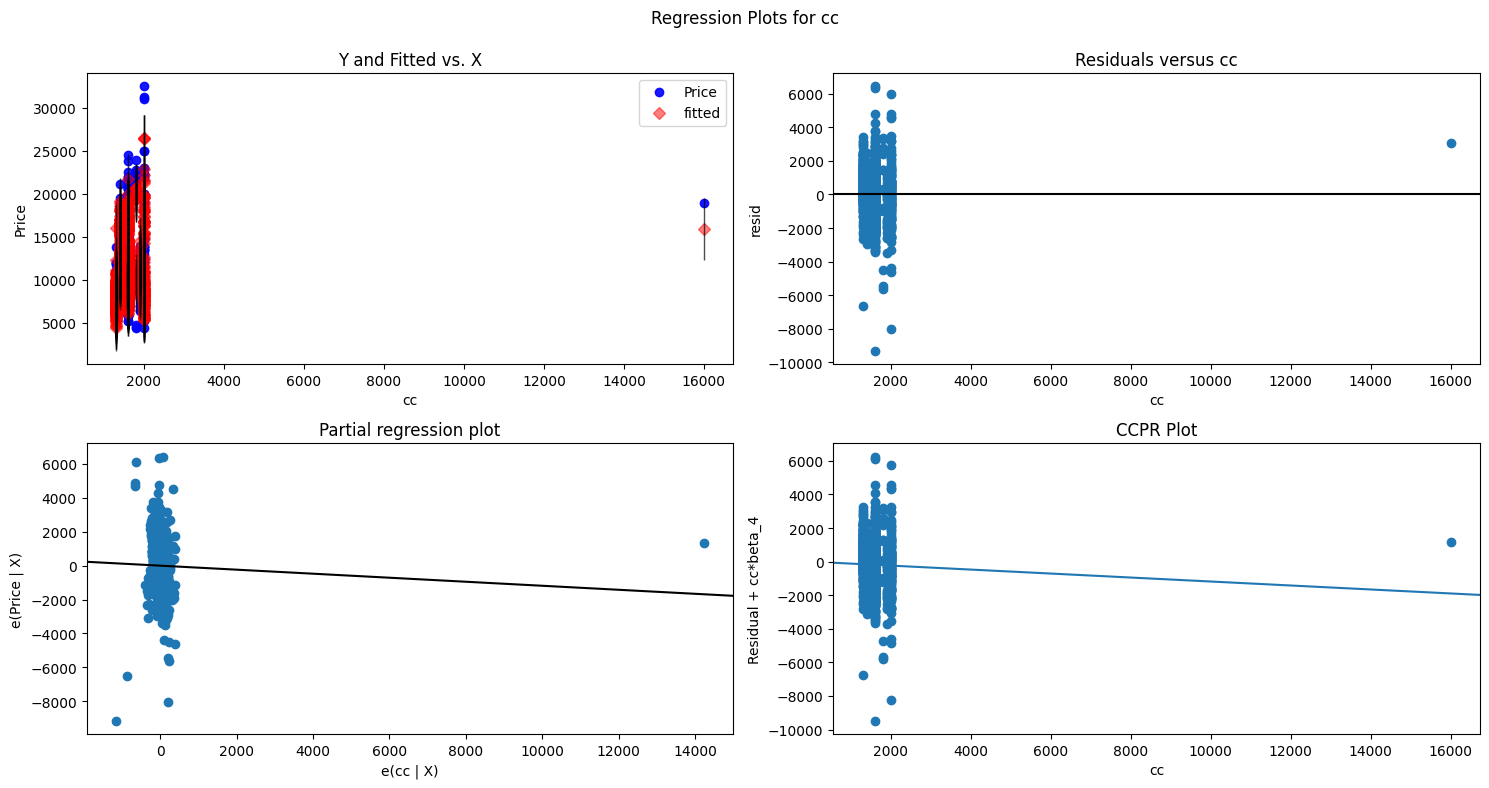

In [90]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


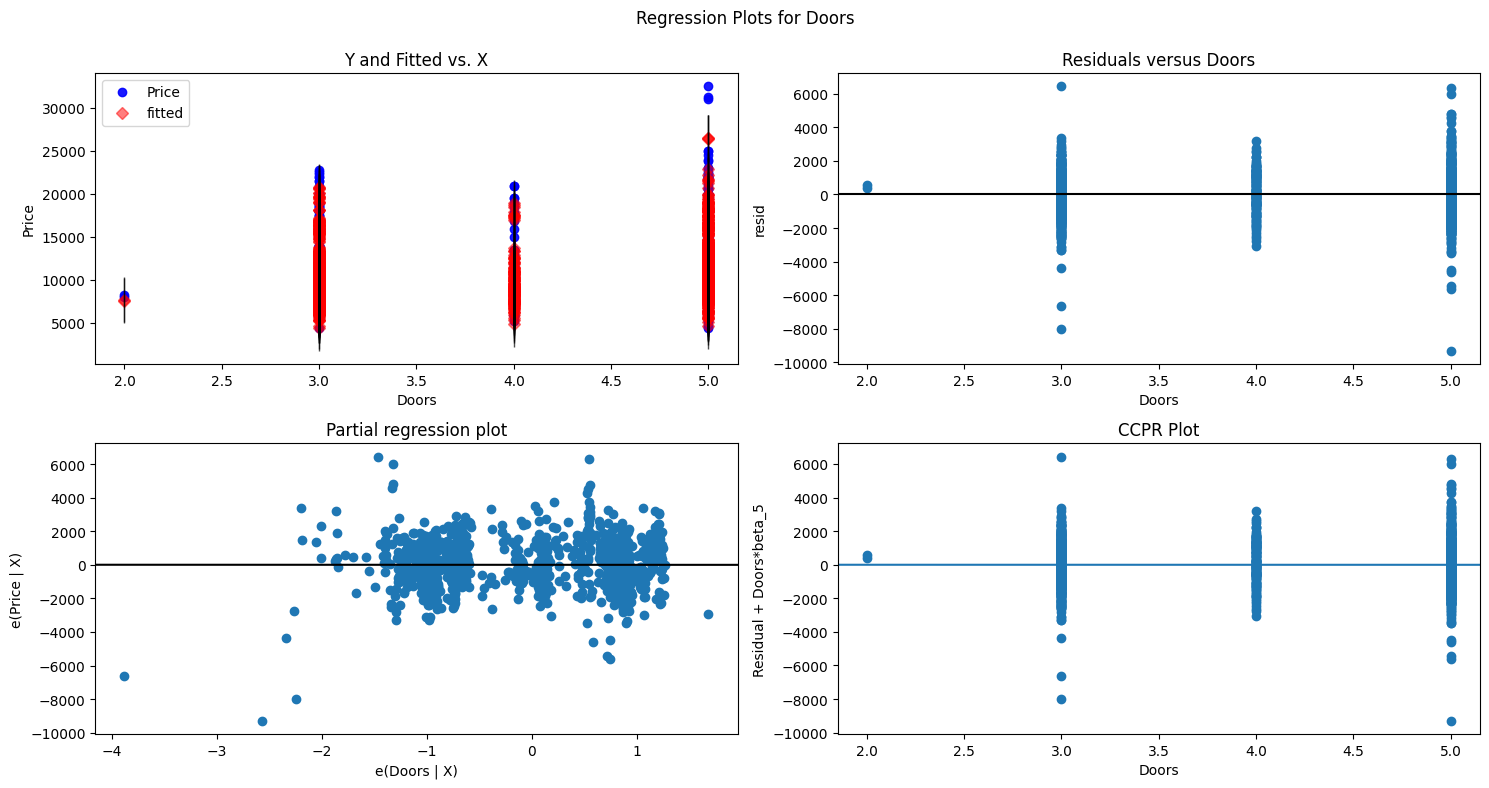

In [91]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


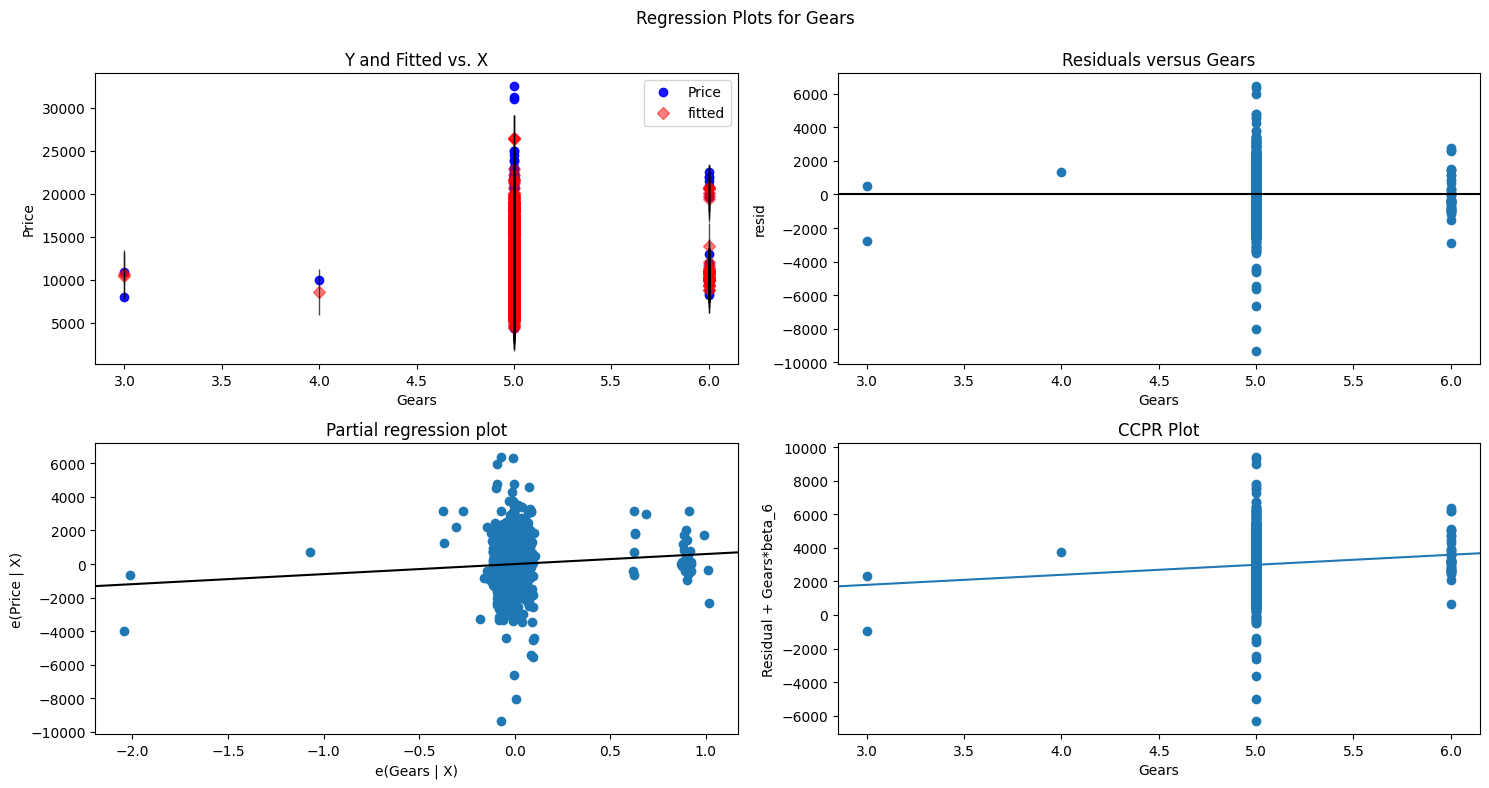

In [92]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


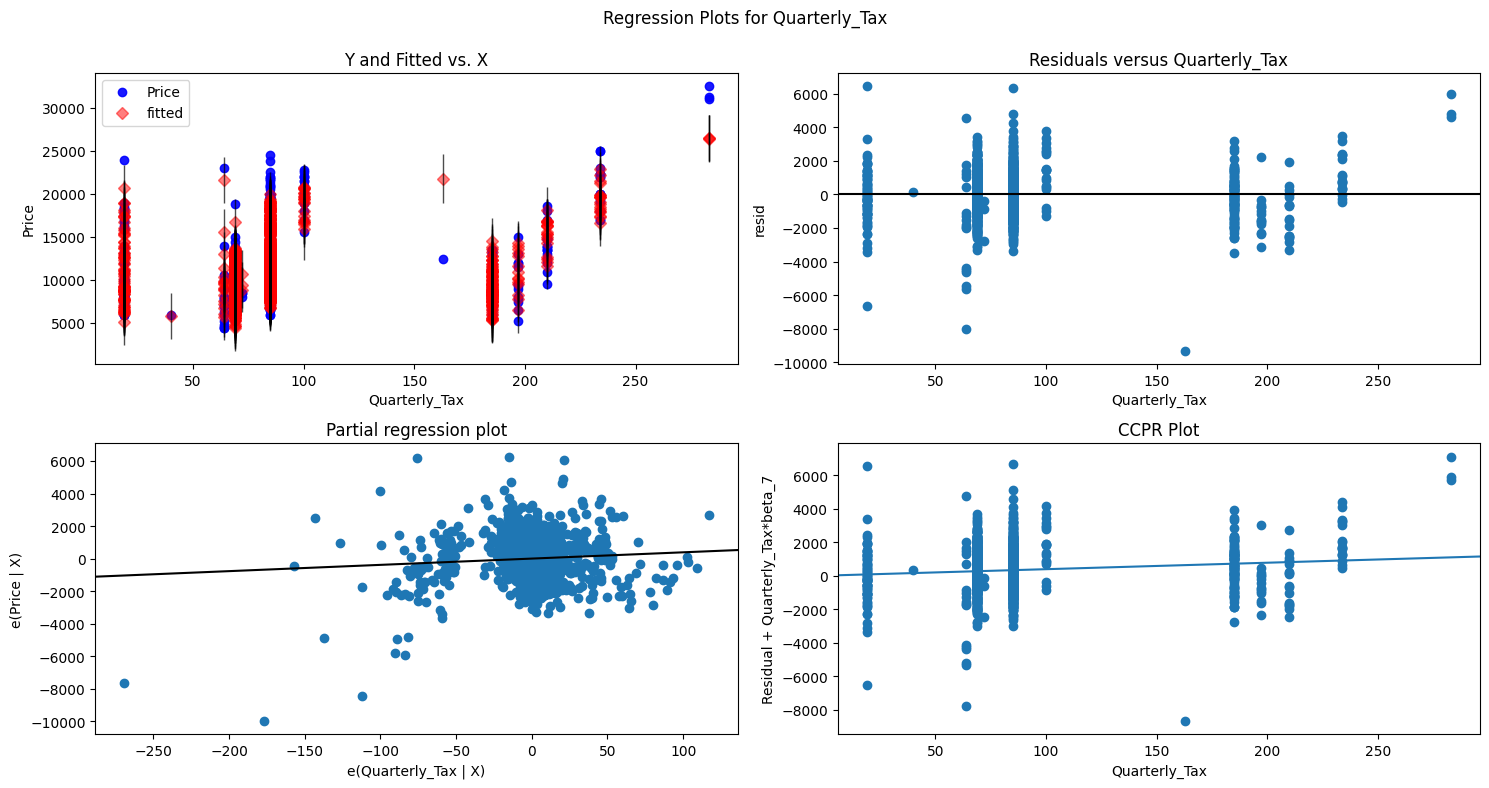

In [93]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


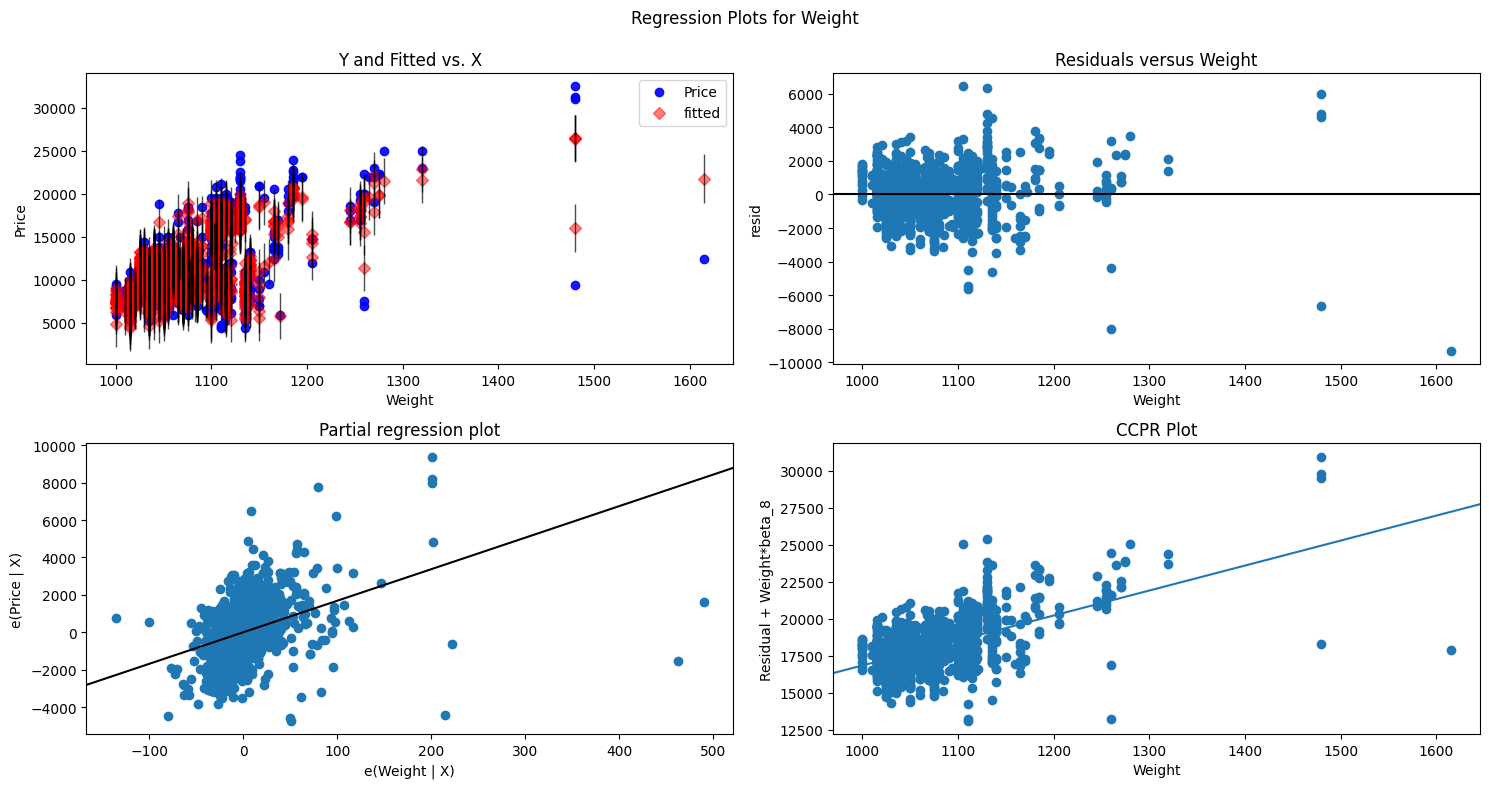

In [95]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

-Cooks distance

In [96]:
m_inf=model.get_influence()
(c,_)=m_inf.cooks_distance

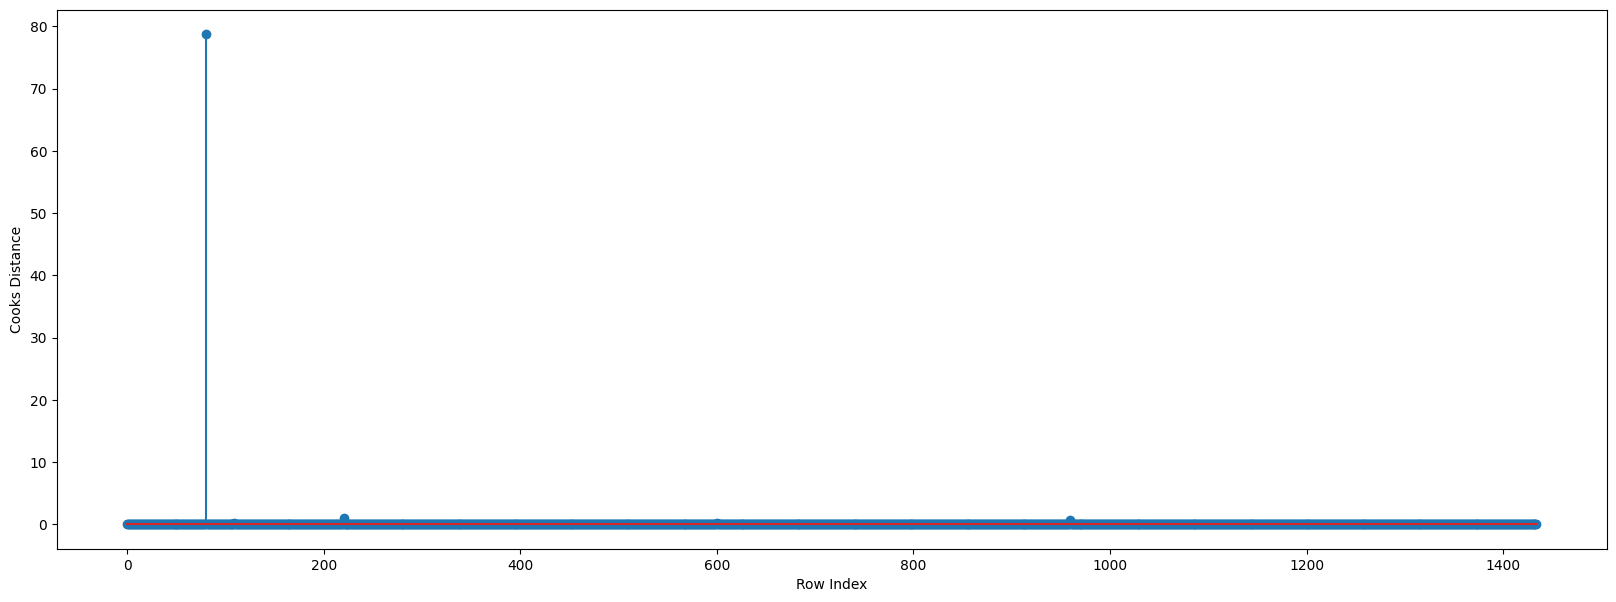

In [99]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tc1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [98]:
np.max(c),np.argmax(c)

(78.72950582258932, 80)

-High influence points

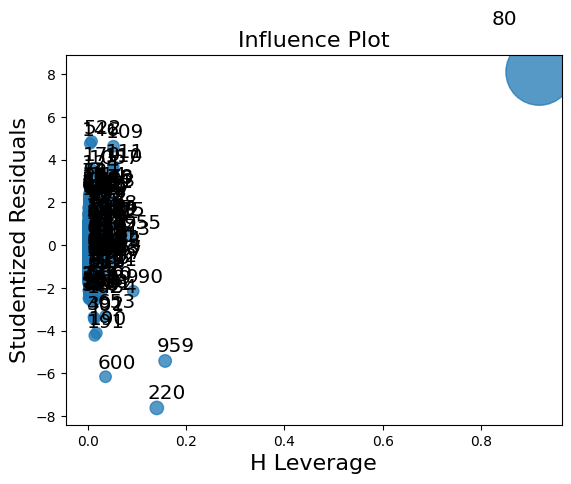

In [100]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [102]:
k = tc1.shape[1]
n = tc1.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.020905923344947737

In [103]:
tc_n=tc1.drop(tc1.index[[80]],axis=0).reset_index()

In [104]:
tc.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


-New model

In [105]:
final=snf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=tc_n).fit()

In [106]:
final.rsquared,final.rsquared_adj

(0.8681163912634055, 0.8673759920564632)

-Cooks distance

In [108]:
final_influence = final.get_influence()
(c_f, _) = final_influence.cooks_distance

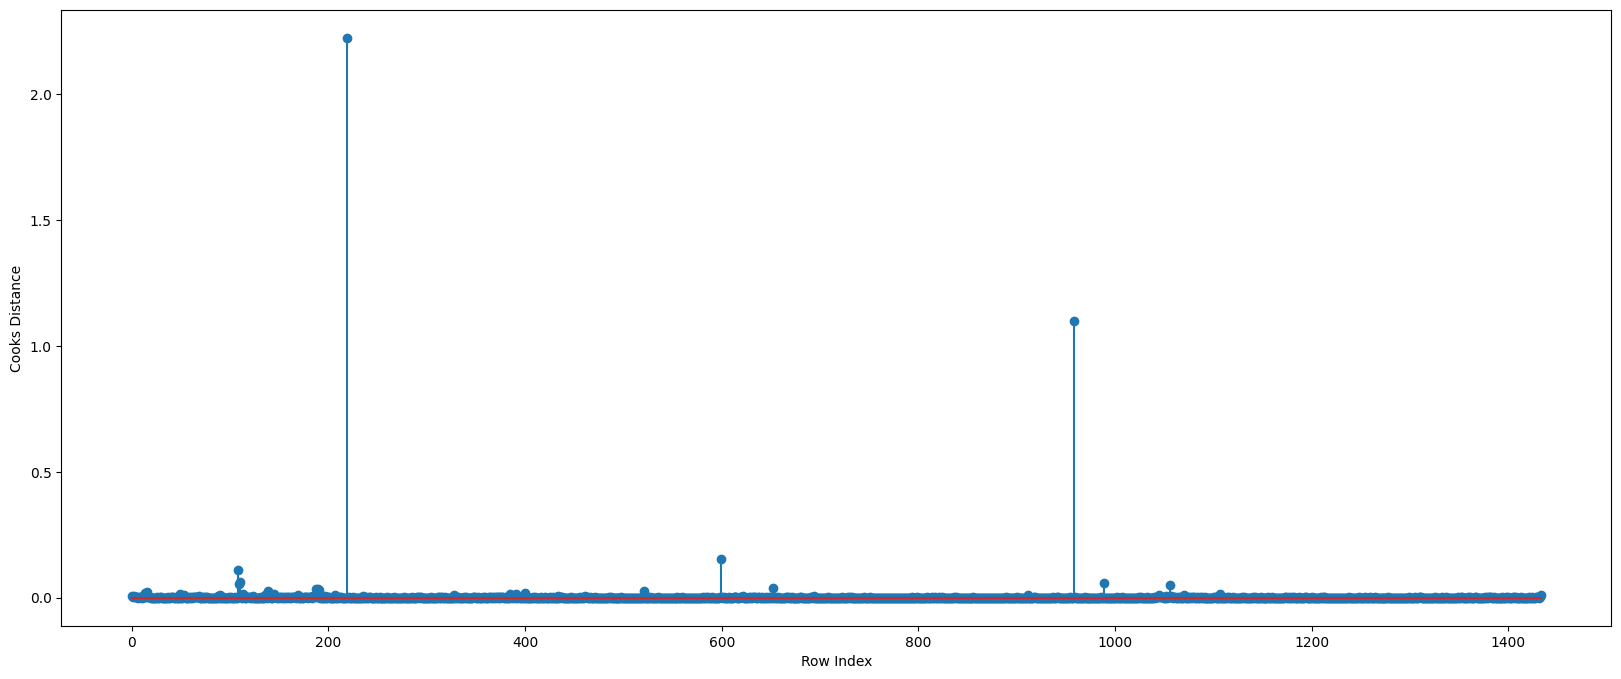

In [109]:
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(tc_n)), np.round(c_f,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [123]:
np.argmax(c_f)
list(np.where(c_f>1))

[array([219, 958])]

In [128]:
tc_2=tc_n.drop(tc_n.index[[219,958]],axis=0).reset_index()
tc_2.head(5)

,level_0,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,4,13750,30,38500,90,2000,3,5,210,1170


In [129]:
tc_2.drop(['index','level_0'],axis=1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [130]:
final_new=snf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=tc_2).fit()

In [131]:
final_new.rsquared,final_new.aic

(0.8839684606741538, 24453.23573612724)

-cooks distance

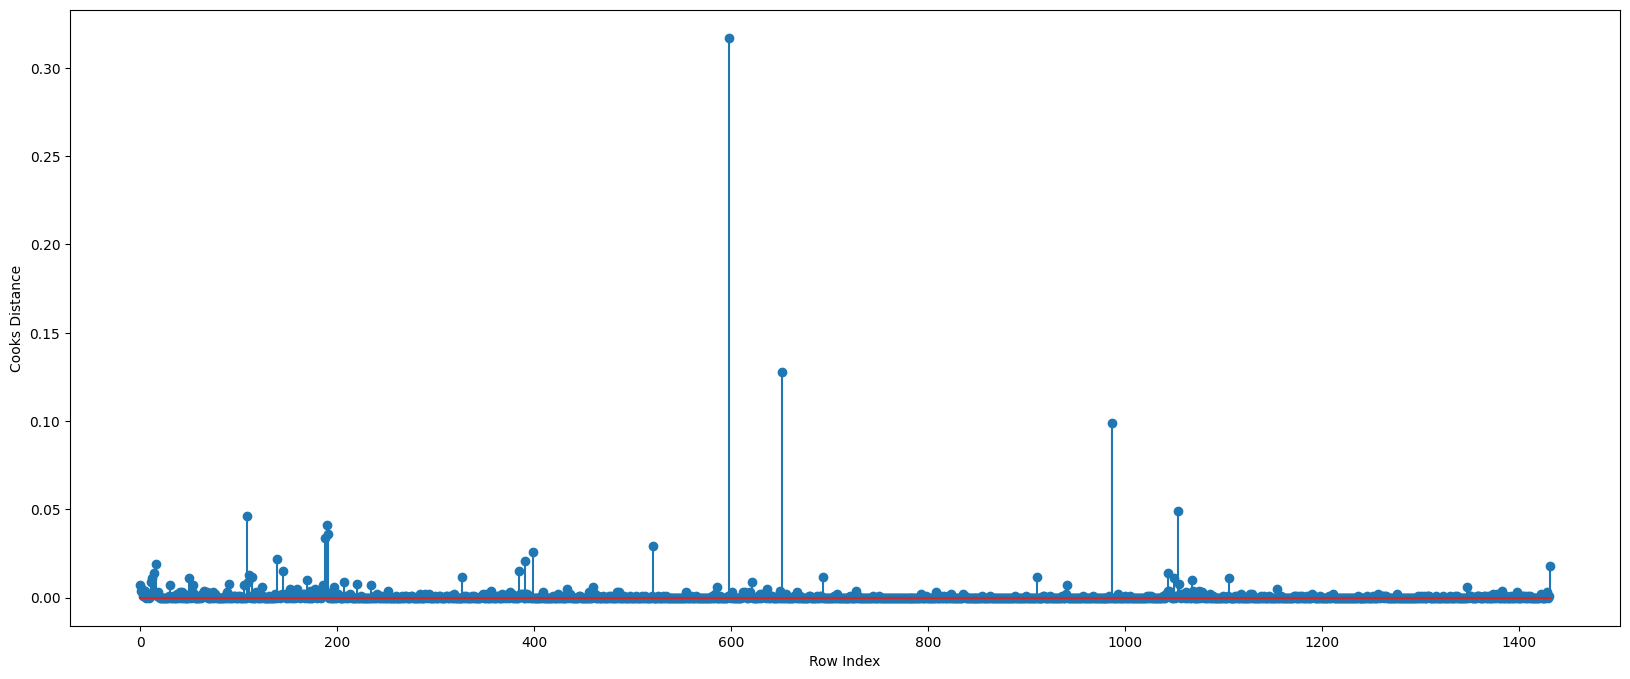

In [133]:
Final_influence = final_new.get_influence()
(c_F, _) = Final_influence.cooks_distance
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(tc_2)), np.round(c_F,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

As C < 1 we will build our final model

In [137]:
# Prediction
nd=pd.DataFrame({"Age_08_04": 28, "KM": 47500, "HP": 90, "cc": 1500, "Doors": 3, "Gears": 5, "Quarterly_Tax": 150, "Weight": 1000}, index =[1])

In [138]:
final_new.predict(nd)

1    12296.168732
dtype: float64